# **Importar y Declaraci√≥n de Variables**



In [21]:
# Librer√≠as principales
import pandas as pd
import matplotlib.pyplot as plt
import urllib.error
import folium

urls = {
      'Tienda 1': 'https://raw.githubusercontent.com/PamelaOrmeno/challenge-analisis-negocio/refs/heads/main/base-de-datos-challenge1-latam/tienda_1.csv',
      'Tienda 2': 'https://raw.githubusercontent.com/PamelaOrmeno/challenge-analisis-negocio/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv',
      'Tienda 3': 'https://raw.githubusercontent.com/PamelaOrmeno/challenge-analisis-negocio/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv',
      'Tienda 4': 'https://raw.githubusercontent.com/PamelaOrmeno/challenge-analisis-negocio/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv'
  }

# Lista para almacenar los DataFrames
dataframes = []

# Leer cada archivo CSV
for nombre_tienda, url in urls.items():
    try:
        df = pd.read_csv(url)
        if 'Precio' not in df.columns:
            raise ValueError(f"La columna 'Precio' no est√° presente en {nombre_tienda}")
        df['Tienda'] = nombre_tienda
        dataframes.append(df)
    except urllib.error.URLError:
        print(f"No se pudo acceder al archivo de {nombre_tienda}")
    except Exception as e:
        print(f"Error en {nombre_tienda}: {e}")

# Combinar todos los DataFrames en uno solo
df_final = pd.concat(dataframes, ignore_index=True)

# Definir colores diferentes para cada tienda
colores = {
    "Tienda 1": "#FF6F61",  # Rojo suave
    "Tienda 2": "#6B5B95",  # Azul/violeta
    "Tienda 3": "#88B04B",  # Verde oliva
    "Tienda 4": "#FFA500"   # Naranjo
}

#**1. Ingreso Total por Cada Tienda**

### C√°lculo - Ingreso Total por Tienda

In [22]:
try:
    # Validar que existan las columnas necesarias
    if "Tienda" not in df_final.columns or "Precio" not in df_final.columns:
        raise KeyError("El DataFrame no contiene las columnas 'Tienda' y/o 'Precio'.")

    # Agrupar por tienda y sumar los ingresos
    ingresos_por_tienda = (
        df_final.groupby("Tienda")["Precio"]
        .sum()
        .sort_values(ascending=False)
    )

    # Mostrar ingresos por tienda formateados como moneda USD
    for tienda, ingreso in ingresos_por_tienda.items():
        ingreso_formateado = "${:,.0f}".format(ingreso).replace(",", ".")  # Reemplaza ',' por '.'
        print(f"{tienda}: {ingreso_formateado}")

except KeyError as e:
    print(f"Error de clave: {e}")
except Exception as e:
    print(f"Ocurri√≥ un error al calcular los ingresos por tienda: {e}")


Tienda 1: $1.150.880.400
Tienda 2: $1.116.343.500
Tienda 3: $1.098.019.600
Tienda 4: $1.038.375.700


###Gr√°fico de Barra - Ingreso Total por Tienda

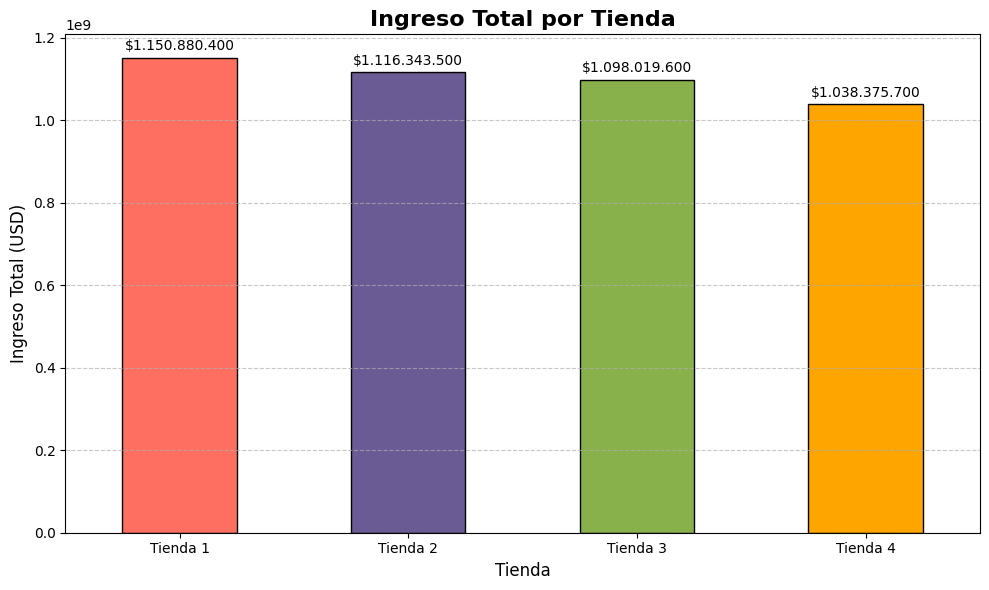

In [23]:
try:
    # Validar que ingresos_por_tienda no est√© vac√≠o
    if ingresos_por_tienda.empty:
        raise ValueError("La serie 'ingresos_por_tienda' est√° vac√≠a. No se puede generar el gr√°fico.")

    # Validar que todos los nombres de tienda tengan un color definido
    if not all(tienda in colores for tienda in ingresos_por_tienda.index):
        raise KeyError("Faltan colores definidos para una o m√°s tiendas.")

    # Crear gr√°fico de barras
    plt.figure(figsize=(10, 6))
    bars = ingresos_por_tienda.plot(
        kind='bar',
        color=[colores[tienda] for tienda in ingresos_por_tienda.index],
        edgecolor='black'
    )

    # T√≠tulos y etiquetas
    plt.title("Ingreso Total por Tienda", fontsize=16, weight='bold')
    plt.xlabel("Tienda", fontsize=12)
    plt.ylabel("Ingreso Total (USD)", fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Anotar los valores sobre cada barra
    for i, valor in enumerate(ingresos_por_tienda):
        valor_formateado = "${:,.0f}".format(valor).replace(",", ".")
        plt.text(i, valor + (valor * 0.01), valor_formateado, ha='center', va='bottom', fontsize=10)



    plt.tight_layout()
    plt.show()

except KeyError as e:
    print(f"Error de clave: {e}")
except ValueError as e:
    print(f"Error de valor: {e}")
except Exception as e:
    print(f"Ocurri√≥ un error al generar el gr√°fico: {e}")


### Conclusi√≥n - Ingreso total por cada tienda

El an√°lisis del ingreso total por tienda revela una **distribuci√≥n equilibrada**, aunque con **diferencias relevantes** que permiten establecer prioridades estrat√©gicas:

- Tienda 1 lidera el ranking con un ingreso total de 1.150.880.400 USD, posicion√°ndose como el punto de venta m√°s rentable. Esto sugiere una alta eficiencia operativa o una ubicaci√≥n estrat√©gica favorable.
- Le siguen Tienda 2 con 1.116.343.500 USD y Tienda 3 con 1.098.019.600 USD, ambas con desempe√±os s√≥lidos y muy cercanos al l√≠der, lo que indica una **competitividad estable entre estos locales**.
- Tienda 4, aunque con el menor ingreso (1.038.375.700 USD), mantiene un nivel alto de ventas, lo cual demuestra un buen rendimiento general a nivel de red.

En conjunto, todas las tiendas superan los 1.000 millones de d√≥lares en ingresos, lo que refleja un **excelente comportamiento comercial** en el per√≠odo analizado. Se recomienda mantener y reforzar las estrategias que han impulsado los resultados actuales, prestando atenci√≥n a las **oportunidades de optimizaci√≥n espec√≠ficas para cada tienda**.


#**2. Ventas por Categor√≠a**

###C√°lculo - Venta por Categor√≠a

In [25]:
try:
    # Validar que las columnas necesarias existan en el DataFrame
    columnas_requeridas = {'Tienda', 'Categor√≠a del Producto', 'Producto'}
    if not columnas_requeridas.issubset(df_final.columns):
        faltantes = columnas_requeridas - set(df_final.columns)
        raise KeyError(f"Faltan las siguientes columnas en el DataFrame: {faltantes}")

    # Agrupar y contar cantidad de productos vendidos por tienda y categor√≠a
    ventas_categoria = (
        df_final.groupby(['Tienda', 'Categor√≠a del Producto'])['Producto']
        .count()
        .reset_index()
        .rename(columns={'Producto': 'Cantidad Vendida'})
        .sort_values(['Tienda', 'Cantidad Vendida'], ascending=[True, False])
    )

    # Formatear la columna de cantidades con punto como separador de miles
    ventas_categoria['Cantidad Vendida'] = ventas_categoria['Cantidad Vendida'].apply(
        lambda x: f"{x:,}".replace(",", ".")
    )

    # Mostrar resultados
    print(ventas_categoria)

except KeyError as e:
    print(f"Error de clave: {e}")
except Exception as e:
    print(f"Error en el c√°lculo de ventas por categor√≠a: {e}")


      Tienda   Categor√≠a del Producto Cantidad Vendida
7   Tienda 1                  Muebles              465
3   Tienda 1             Electr√≥nicos              448
5   Tienda 1                 Juguetes              324
2   Tienda 1        Electrodom√©sticos              312
1   Tienda 1     Deportes y diversi√≥n              284
4   Tienda 1   Instrumentos musicales              182
6   Tienda 1                   Libros              173
0   Tienda 1  Art√≠culos para el hogar              171
15  Tienda 2                  Muebles              442
11  Tienda 2             Electr√≥nicos              422
13  Tienda 2                 Juguetes              313
10  Tienda 2        Electrodom√©sticos              305
9   Tienda 2     Deportes y diversi√≥n              275
12  Tienda 2   Instrumentos musicales              224
14  Tienda 2                   Libros              197
8   Tienda 2  Art√≠culos para el hogar              181
23  Tienda 3                  Muebles              499
1

###Gr√°fico de Barra - Venta por Categor√≠a

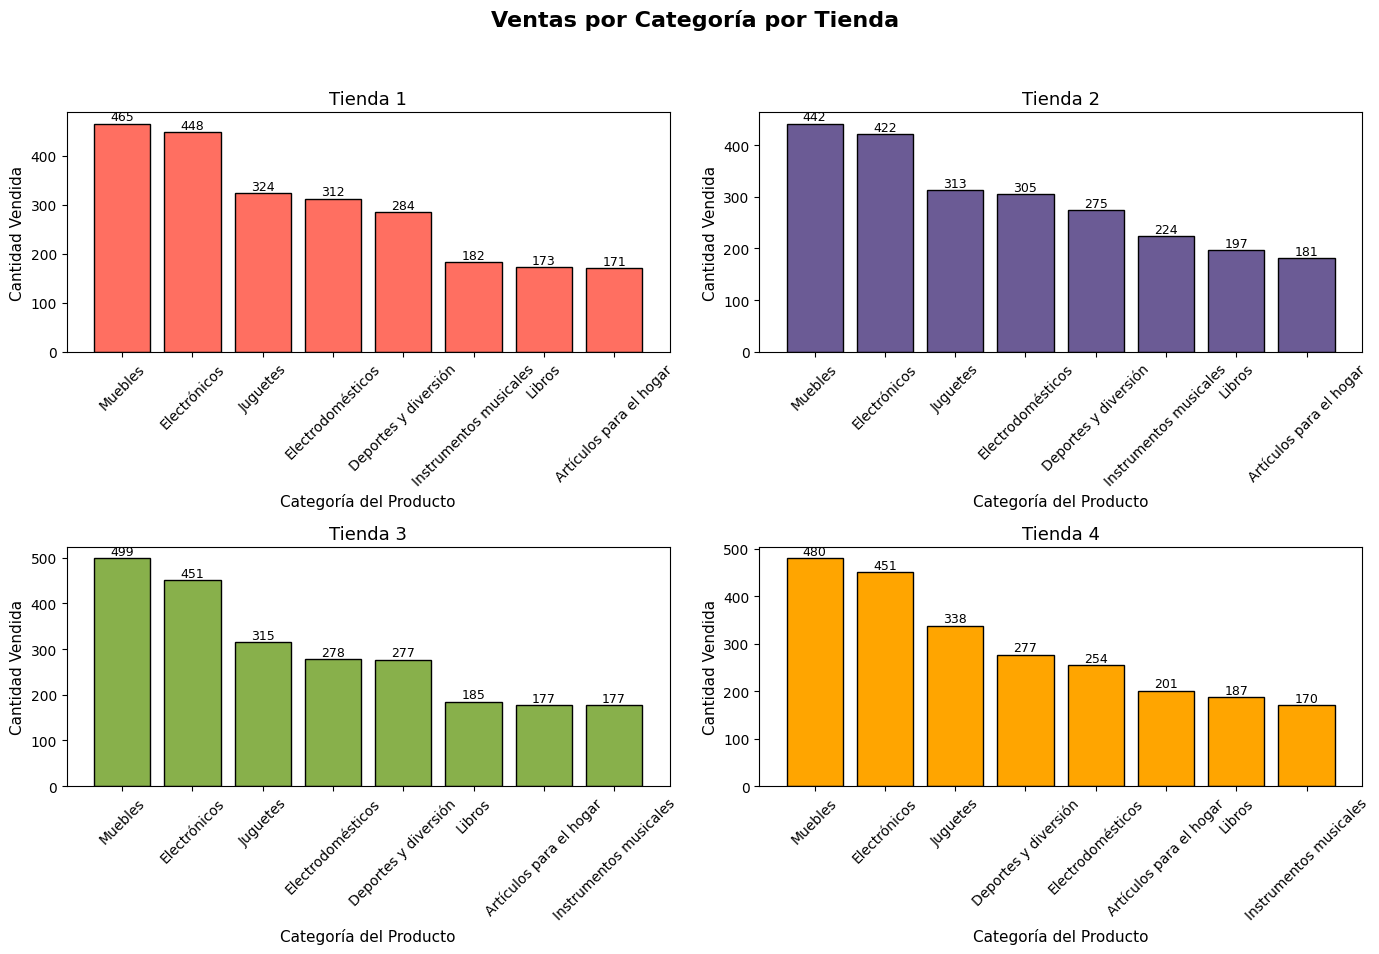

In [27]:
try:
    # Validar columnas requeridas
    columnas_requeridas = {'Tienda', 'Categor√≠a del Producto', 'Cantidad Vendida'}
    if not columnas_requeridas.issubset(ventas_categoria.columns):
        faltantes = columnas_requeridas - set(ventas_categoria.columns)
        raise KeyError(f"Faltan columnas en 'ventas_categoria': {faltantes}")

    # Asegurarse de que Cantidad Vendida sea num√©rica (por si fue formateada antes)
    ventas_categoria['Cantidad Vendida'] = pd.to_numeric(ventas_categoria['Cantidad Vendida'], errors='coerce')

    # Crear subplots
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Ventas por Categor√≠a por Tienda', fontsize=16, weight='bold')

    tiendas_unicas = ventas_categoria['Tienda'].unique()

    for i, tienda in enumerate(tiendas_unicas):
        if i >= 4:
            print(f"‚ö†Ô∏è Advertencia: solo se mostrar√°n las primeras 4 tiendas. '{tienda}' quedar√° fuera del gr√°fico.")
            continue

        ax = axs[i // 2, i % 2]
        datos_tienda = ventas_categoria[ventas_categoria['Tienda'] == tienda]
        datos_tienda = datos_tienda.sort_values(by='Cantidad Vendida', ascending=False)

        ax.bar(
            datos_tienda['Categor√≠a del Producto'],
            datos_tienda['Cantidad Vendida'],
            color=colores.get(tienda, 'gray'),
            edgecolor='black'
        )
        ax.set_title(f"{tienda}", fontsize=13)
        ax.set_xlabel('Categor√≠a del Producto', fontsize=11)
        ax.set_ylabel('Cantidad Vendida', fontsize=11)
        ax.tick_params(axis='x', rotation=45)

        # A√±adir etiquetas con formato separador de miles
        for j, valor in enumerate(datos_tienda['Cantidad Vendida']):
            if pd.notnull(valor):
                texto = f"{valor:,.0f}".replace(",", ".")
                ax.text(j, valor + 0.5, texto, ha='center', va='bottom', fontsize=9)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

except KeyError as e:
    print(f"Error de clave: {e}")
except TypeError as e:
    print(f"Error de tipo: {e}")
except Exception as e:
    print(f"Ocurri√≥ un error al generar el gr√°fico por tienda: {e}")


###Gr√°fico Barras Apiladas - Venta por Categor√≠a

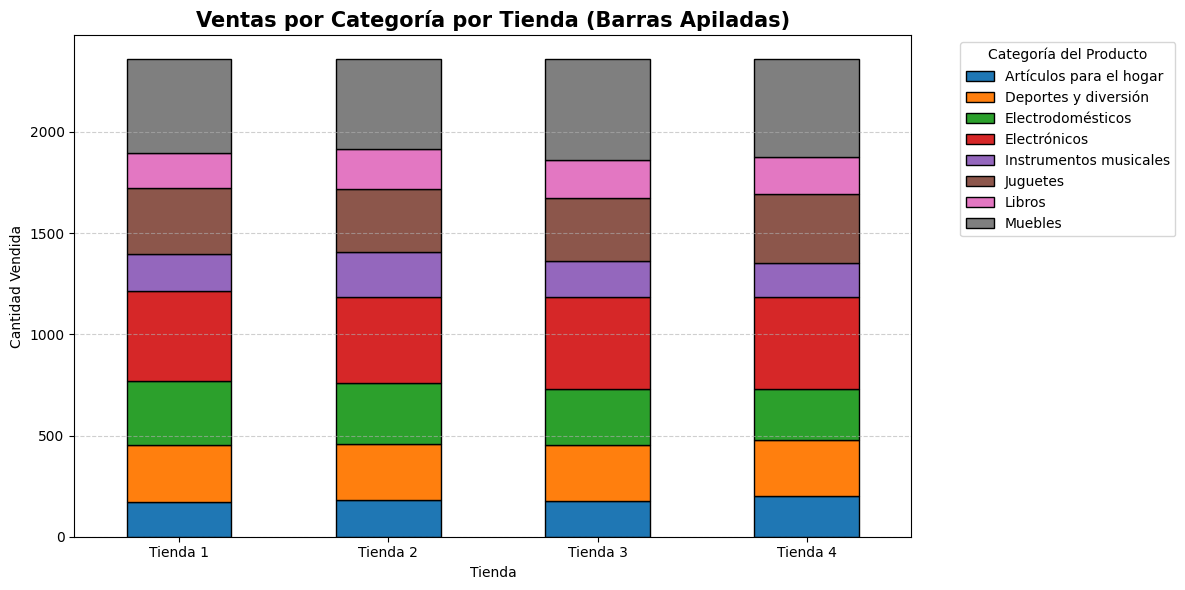

In [28]:
try:
    # Validar columnas necesarias
    columnas_requeridas = {'Tienda', 'Categor√≠a del Producto', 'Cantidad Vendida'}
    if not columnas_requeridas.issubset(ventas_categoria.columns):
        faltantes = columnas_requeridas - set(ventas_categoria.columns)
        raise KeyError(f"Faltan columnas en 'ventas_categoria': {faltantes}")

    # Asegurar que 'Cantidad Vendida' sea num√©rica
    ventas_categoria['Cantidad Vendida'] = pd.to_numeric(ventas_categoria['Cantidad Vendida'], errors='coerce')

    # Crear tabla pivote
    pivot_df = ventas_categoria.pivot_table(
        index='Tienda',
        columns='Categor√≠a del Producto',
        values='Cantidad Vendida',
        aggfunc='sum',
        fill_value=0  # por si hay categor√≠as faltantes en alguna tienda
    )

    # Graficar barras apiladas
    pivot_df.plot(
        kind='bar',
        stacked=True,
        figsize=(12, 6),
        edgecolor='black'
    )

    plt.title("Ventas por Categor√≠a por Tienda (Barras Apiladas)", fontsize=15, weight='bold')
    plt.xlabel("Tienda")
    plt.ylabel("Cantidad Vendida")
    plt.xticks(rotation=0)
    plt.legend(title='Categor√≠a del Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Ocurri√≥ un error al graficar barras apiladas: {e}")


### Conclusi√≥n - Venta por Categor√≠a

El an√°lisis de ventas por categor√≠a revela patrones consistentes entre las tiendas, permitiendo identificar las preferencias de los consumidores y el peso relativo de cada l√≠nea de productos:

- **Muebles** es la categor√≠a m√°s vendida en todas las tiendas, con especial fuerza en la Tienda 3 (499 unidades) y Tienda 4 (480 unidades), consolid√°ndose como el rubro m√°s fuerte en t√©rminos de volumen general.
- **Electr√≥nicos** mantiene una posici√≥n destacada en las cuatro tiendas, con un m√°ximo de 451 unidades vendidas en Tienda 3 y Tienda 4. Este comportamiento sugiere una demanda constante por tecnolog√≠a y dispositivos.
- **Juguetes** y **Electrodom√©sticos** compiten por el tercer lugar en ventas. Aunque sus vol√∫menes son m√°s bajos, su presencia estable en cada tienda indica que son categor√≠as importantes dentro del mix comercial.
- **Deportes y diversi√≥n**, **Libros**, **Art√≠culos para el hogar** e **Instrumentos musicales** presentan ventas m√°s moderadas, pero distribuidas consistentemente, lo que sugiere un comportamiento de consumo m√°s nicho, aunque relevante.

Este desglose permite identificar oportunidades espec√≠ficas de crecimiento y focalizaci√≥n. Mientras que las categor√≠as l√≠deres podr√≠an beneficiarse de mayor stock y promociones, las de menor rotaci√≥n podr√≠an ser optimizadas a trav√©s de campa√±as especializadas o una mejor exhibici√≥n por tienda.

#**3. Valoraci√≥n Promedio Tienda**

###C√°lculo - Valoraci√≥n Promedio Tienda

In [29]:
try:
    # Validar que exista la columna 'Calificaci√≥n' y 'Tienda'
    columnas_necesarias = {'Calificaci√≥n', 'Tienda'}
    if not columnas_necesarias.issubset(df_final.columns):
        faltantes = columnas_necesarias - set(df_final.columns)
        raise ValueError(f"Faltan columnas requeridas: {faltantes}")

    # Calcular promedio de calificaci√≥n por tienda, redondeado a 2 decimales
    calificacion_promedio = df_final.groupby('Tienda')['Calificaci√≥n'].mean().round(2)

    # Ordenar por orden manual si est√°n todas las tiendas
    orden_manual = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
    tiendas_faltantes = [t for t in orden_manual if t not in calificacion_promedio.index]
    if tiendas_faltantes:
        print(f"‚ö†Ô∏è Advertencia: no se encontraron las siguientes tiendas: {tiendas_faltantes}")

    calificacion_promedio = calificacion_promedio.reindex(orden_manual)

    # Mostrar calificaciones con punto como separador decimal (ya es el est√°ndar)
    for tienda, calificacion in calificacion_promedio.items():
        if pd.notnull(calificacion):
            print(f"{tienda}: {calificacion:.2f}")
        else:
            print(f"{tienda}: (sin datos)")

except Exception as e:
    print(f"Error en el c√°lculo de la calificaci√≥n promedio: {e}")


Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


##Gr√°fico de Barra - Valoraci√≥n Promedio por Tienda

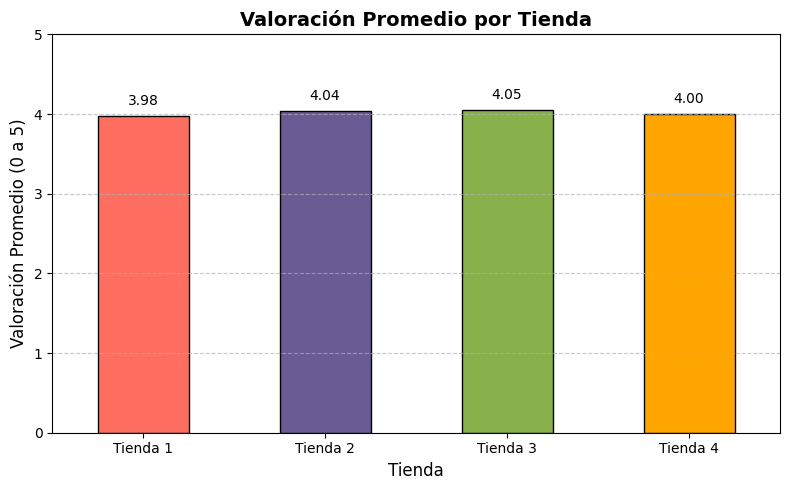

In [30]:
try:
    # Validar que 'calificacion_promedio' est√© definido y tenga datos
    if 'calificacion_promedio' not in locals() or calificacion_promedio.empty:
        raise ValueError("No se ha definido o est√° vac√≠o el objeto 'calificacion_promedio'.")

    # Validar √≠ndice esperado
    tiendas_esperadas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
    tiendas_faltantes = [t for t in tiendas_esperadas if t not in calificacion_promedio.index]
    if tiendas_faltantes:
        print(f"Advertencia: faltan datos de calificaci√≥n para: {tiendas_faltantes}")

    # Reordenar manualmente
    calificacion_promedio = calificacion_promedio.reindex(tiendas_esperadas)

    # Crear gr√°fico
    plt.figure(figsize=(8, 5))
    bars = calificacion_promedio.plot(
        kind='bar',
        color=[colores.get(t, 'gray') for t in calificacion_promedio.index],
        edgecolor='black'
    )

    # T√≠tulos y etiquetas
    plt.title("Valoraci√≥n Promedio por Tienda", fontsize=14, weight='bold')
    plt.xlabel("Tienda", fontsize=12)
    plt.ylabel("Valoraci√≥n Promedio (0 a 5)", fontsize=12)
    plt.ylim(0, 5)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Agregar etiquetas con formato decimal (punto como separador)
    for i, valor in enumerate(calificacion_promedio):
        if pd.notnull(valor):
            plt.text(i, valor + 0.1, f"{valor:.2f}", ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

except ValueError as e:
    print(f"Error de validaci√≥n: {e}")
except Exception as e:
    print(f"Ocurri√≥ un error al generar el gr√°fico de valoraci√≥n promedio: {e}")


##Gr√°fico Torta - Valoraci√≥n Promedio por Tienda

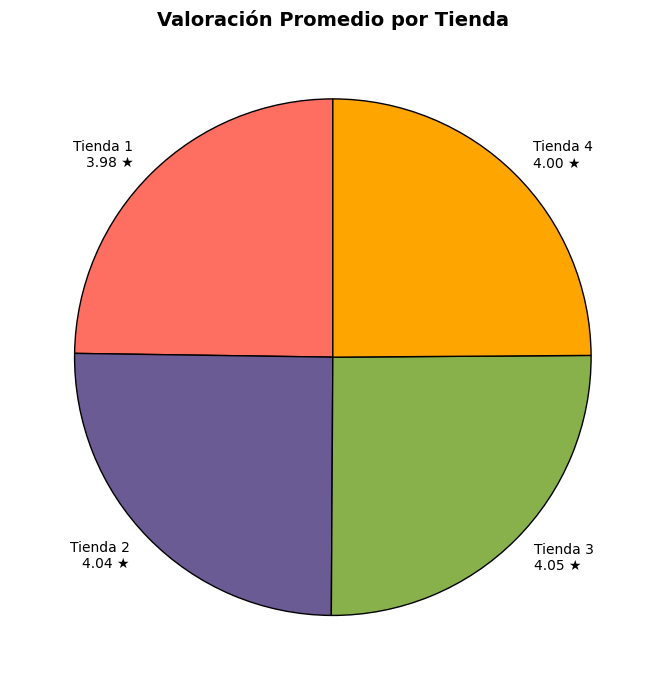

In [31]:
try:
    import matplotlib.pyplot as plt

    # Validaci√≥n b√°sica
    if 'calificacion_promedio' not in locals() or calificacion_promedio.empty:
        raise ValueError("No se ha definido o est√° vac√≠o el objeto 'calificacion_promedio'.")

    # Definir colores por tienda si est√°n disponibles
    colores_torta = [colores.get(t, 'gray') for t in calificacion_promedio.index]

    # Crear gr√°fico de torta
    plt.figure(figsize=(7, 7))
    plt.pie(
        calificacion_promedio,
        labels=[f"{tienda}\n{valor:.2f} ‚òÖ" for tienda, valor in calificacion_promedio.items()],
        colors=colores_torta,
        startangle=90,
        wedgeprops={'edgecolor': 'black'}
    )

    plt.title("Valoraci√≥n Promedio por Tienda", fontsize=14, weight='bold')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Ocurri√≥ un error al generar el gr√°fico de torta: {e}")


##Conclusi√≥n - Valoraci√≥n Promedio por Tienda


El an√°lisis de la valoraci√≥n promedio por tienda revela una percepci√≥n positiva y bastante homog√©nea por parte de los clientes en todas las sucursales:

- **Tienda 3** obtiene la valoraci√≥n m√°s alta con un promedio de **4.05**, lo que sugiere un alto nivel de satisfacci√≥n del cliente.
- Le siguen **Tienda 2** con **4.04** y **Tienda 4** con **4.00**, ambas muy bien evaluadas, manteniendo un est√°ndar de servicio consistente.
- **Tienda 1**, aunque con la menor valoraci√≥n promedio (**3.98**), se encuentra dentro del rango positivo, lo que indica un desempe√±o aceptable, pero con margen de mejora respecto al resto.

En general, todas las tiendas se sit√∫an por sobre los **3.9 puntos**, lo que refleja una **experiencia de cliente s√≥lida**, con oportunidades espec√≠ficas de optimizaci√≥n en puntos de contacto, atenci√≥n o log√≠stica, especialmente en Tienda 1.

#**4. Productos M√°s y Menos vendidos**

###C√°lculo - Producto M√°s o Menos vendidos

In [32]:
try:
    # Validar existencia de columnas requeridas
    columnas_requeridas = {'Tienda', 'Producto'}
    if not columnas_requeridas.issubset(df_final.columns):
        faltantes = columnas_requeridas - set(df_final.columns)
        raise ValueError(f"Faltan columnas requeridas: {faltantes}")

    # Agrupar y contar productos por tienda
    ventas_productos = (
        df_final.groupby(['Tienda', 'Producto'])
        .size()
        .reset_index(name='Cantidad Vendida')
    )

    if ventas_productos.empty:
        raise ValueError("El DataFrame 'ventas_productos' est√° vac√≠o. No se puede continuar.")

    # Inicializar lista de resultados
    productos_extremos = []

    # Procesar cada tienda
    tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
    for tienda in tiendas:
        datos_tienda = ventas_productos[ventas_productos['Tienda'] == tienda]

        if datos_tienda.empty:
            print(f"Advertencia: {tienda} no tiene datos disponibles.")
            continue

        # Extraer productos extremos
        producto_mas_vendido = datos_tienda.loc[datos_tienda['Cantidad Vendida'].idxmax()]
        producto_menos_vendido = datos_tienda.loc[datos_tienda['Cantidad Vendida'].idxmin()]

        productos_extremos.append({
            'Tienda': tienda,
            'Producto m√°s vendido': producto_mas_vendido['Producto'],
            'Cantidad m√°s vendida': f"{producto_mas_vendido['Cantidad Vendida']:,}".replace(",", "."),
            'Producto menos vendido': producto_menos_vendido['Producto'],
            'Cantidad menos vendida': f"{producto_menos_vendido['Cantidad Vendida']:,}".replace(",", ".")
        })

    # Crear DataFrame ordenado
    tabla_extremos = pd.DataFrame(productos_extremos).sort_values(by='Tienda')

    # Mostrar tabla
    from IPython.display import display
    display(tabla_extremos)

except Exception as e:
    print(f"Error al calcular los productos m√°s y menos vendidos: {e}")


Tienda       Producto m√°s vendido Cantidad m√°s vendida  \
0  Tienda 1                    Armario                   60   
1  Tienda 2  Iniciando en programaci√≥n                   65   
2  Tienda 3              Kit de bancas                   57   
3  Tienda 4                   Cama box                   62   

      Producto menos vendido Cantidad menos vendida  
0  Auriculares con micr√≥fono                     33  
1              Juego de mesa                     32  
2    Bloques de construcci√≥n                     35  
3         Guitarra el√©ctrica                     33

###Gr√°fico de Barra -  Producto M√°s y Menos Vendido por Tienda

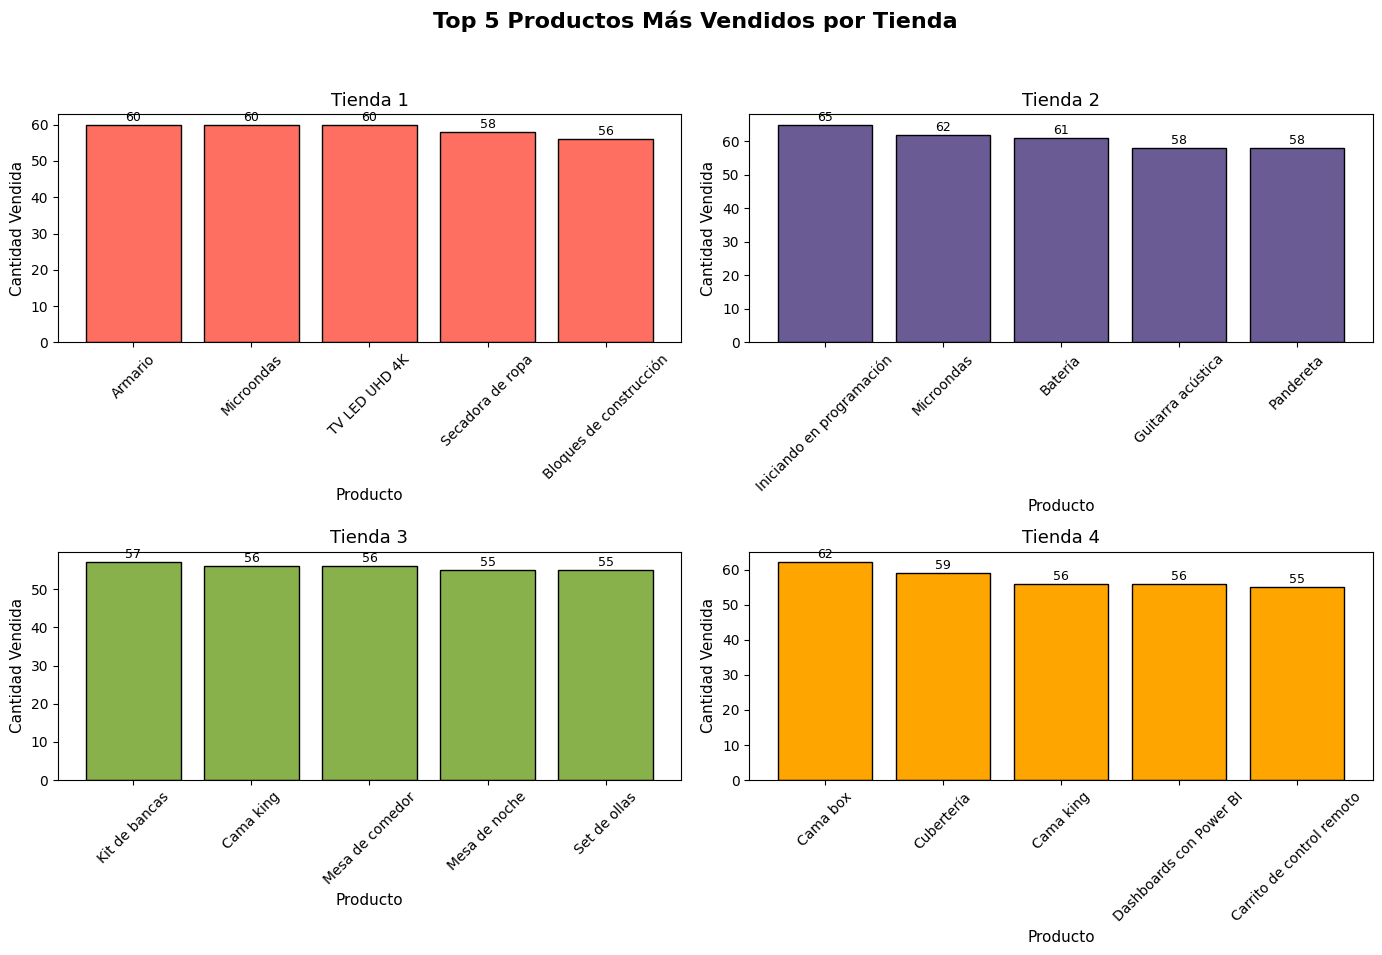

In [34]:
try:
    # Validar existencia de columnas requeridas
    columnas_requeridas = {'Tienda', 'Producto', 'Cantidad Vendida'}
    if not columnas_requeridas.issubset(ventas_productos.columns):
        faltantes = columnas_requeridas - set(ventas_productos.columns)
        raise ValueError(f"Faltan columnas requeridas en 'ventas_productos': {faltantes}")

    # Verificar que existan datos
    if ventas_productos.empty:
        raise ValueError("El DataFrame 'ventas_productos' est√° vac√≠o.")

    # Crear figura y subgr√°ficos
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Top 5 Productos M√°s Vendidos por Tienda', fontsize=16, weight='bold')

    tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

    for i, tienda in enumerate(tiendas):
        ax = axs[i // 2, i % 2]
        datos_tienda = ventas_productos[ventas_productos['Tienda'] == tienda]

        if datos_tienda.empty:
            ax.set_title(f"{tienda} (sin datos)")
            ax.axis('off')
            continue

        top5 = datos_tienda.nlargest(5, 'Cantidad Vendida')

        bars = ax.bar(
            top5['Producto'],
            top5['Cantidad Vendida'],
            color=colores.get(tienda, 'gray'),
            edgecolor='black'
        )

        ax.set_title(f"{tienda}", fontsize=13)
        ax.set_xlabel('Producto', fontsize=11)
        ax.set_ylabel('Cantidad Vendida', fontsize=11)
        ax.tick_params(axis='x', rotation=45)

        # Etiquetas con separador de miles (punto)
        for j, valor in enumerate(top5['Cantidad Vendida']):
            valor_formateado = f"{valor:,.0f}".replace(",", ".")
            ax.text(j, valor + 0.3, valor_formateado, ha='center', va='bottom', fontsize=9)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

except Exception as e:
    print(f"Error al generar el gr√°fico de top productos por tienda: {e}")


### Conclusi√≥n - Productos M√°s y Menos Vendidos


El an√°lisis de los productos m√°s y menos vendidos por tienda permite identificar patrones de consumo y oportunidades comerciales diferenciadas seg√∫n el comportamiento de los clientes:

- **Tienda 1** destaca por la alta demanda del producto *Armario* (60 unidades vendidas), lo que sugiere inter√©s en art√≠culos de mobiliario. En contraste, el producto con menor rotaci√≥n fue *Auriculares con micr√≥fono* (33 unidades), posiblemente reflejando menor prioridad en tecnolog√≠a o accesorios.
- **Tienda 2** lidera en volumen con *Iniciando en programaci√≥n* (65 unidades), lo que indica una fuerte inclinaci√≥n hacia productos educativos. Su producto menos vendido fue *Juego de mesa* (32 unidades), lo que podr√≠a estar vinculado a preferencias familiares o estacionales.
- **Tienda 3** tuvo como producto m√°s solicitado el *Kit de bancas* (57 unidades), lo que refuerza el inter√©s en art√≠culos de ejercicio o mobiliario funcional. El producto con menor demanda fue *Bloques de construcci√≥n* (35 unidades), quiz√°s por una menor presencia de p√∫blico infantil.
- **Tienda 4** alcanz√≥ su mayor volumen de ventas con la *Cama box* (62 unidades), destacando nuevamente la categor√≠a de muebles como fuerte. Por otro lado, la *Guitarra el√©ctrica* (33 unidades) fue la de menor venta, lo que puede estar relacionado con un nicho m√°s espec√≠fico o menor rotaci√≥n.

Este tipo de an√°lisis permite tomar decisiones informadas sobre reposici√≥n, promociones y campa√±as focalizadas, priorizando aquellos productos con mayor impacto comercial en cada tienda, y reevaluando la estrategia para los de menor salida.


#**5. Valor Env√≠o Promedio por Tienda**

###C√°lculo - Valor del env√≠o promedio por tienda

In [35]:
try:
    # Validar existencia de columnas requeridas
    columnas_requeridas = {'Tienda', 'Costo de env√≠o'}
    if not columnas_requeridas.issubset(df_final.columns):
        faltantes = columnas_requeridas - set(df_final.columns)
        raise ValueError(f"Faltan columnas requeridas: {faltantes}")

    # Validar que haya datos
    if df_final.empty:
        raise ValueError("El DataFrame 'df_final' est√° vac√≠o.")

    # Calcular promedio del costo de env√≠o por tienda
    envio_promedio = df_final.groupby('Tienda')['Costo de env√≠o'].mean().round(0)

    # Orden manual para consistencia
    orden_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
    envio_promedio = envio_promedio.reindex(orden_tiendas)

    # Mostrar resultados con formato moneda USD y punto como separador de miles
    for tienda, costo in envio_promedio.items():
        if pd.notnull(costo):
            print(f"{tienda}: ${int(costo):,}".replace(",", "."))
        else:
            print(f"{tienda}: (sin datos)")

except ValueError as e:
    print(f"Error de validaci√≥n: {e}")
except Exception as e:
    print(f"Error en el c√°lculo del env√≠o promedio por tienda: {e}")


Tienda 1: $26.019
Tienda 2: $25.216
Tienda 3: $24.806
Tienda 4: $23.459


##Gr√°fico de Barra - Costo Promedio de Env√≠o

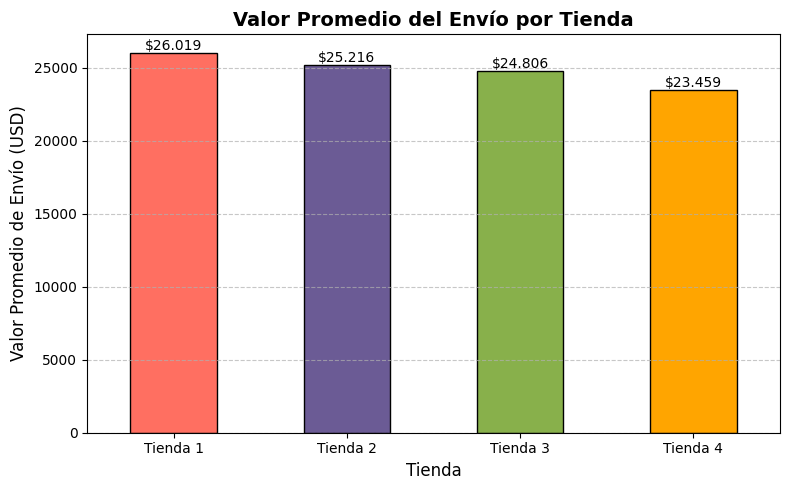

In [36]:
try:
    # Validar que 'envio_promedio' exista y no est√© vac√≠o
    if 'envio_promedio' not in locals() or envio_promedio.empty:
        raise ValueError("El objeto 'envio_promedio' no est√° definido o no contiene datos.")

    # Validar √≠ndice esperado (opcional)
    tiendas_esperadas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
    envio_promedio = envio_promedio.reindex(tiendas_esperadas)

    # Crear gr√°fico
    plt.figure(figsize=(8, 5))
    bars = envio_promedio.plot(
        kind='bar',
        color=[colores.get(tienda, 'gray') for tienda in envio_promedio.index],
        edgecolor='black'
    )

    # T√≠tulos y etiquetas
    plt.title("Valor Promedio del Env√≠o por Tienda", fontsize=14, weight='bold')
    plt.xlabel("Tienda", fontsize=12)
    plt.ylabel("Valor Promedio de Env√≠o (USD)", fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Etiquetas de valor sobre cada barra
    for i, valor in enumerate(envio_promedio):
        if pd.notnull(valor):
            valor_formateado = f"${valor:,.0f}".replace(",", ".")
            plt.text(i, valor + 0.5, valor_formateado, ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error al generar el gr√°fico de env√≠o promedio: {e}")


##Gr√°fico de l√≠neas - Costo promedio de env√≠o

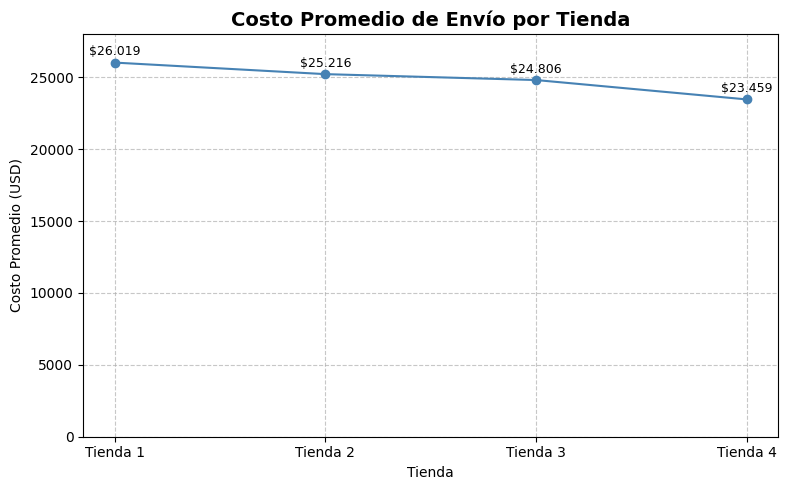

In [37]:
try:
    # Validaci√≥n de datos
    if 'envio_promedio' not in locals() or envio_promedio.empty:
        raise ValueError("El objeto 'envio_promedio' no est√° definido o no contiene datos.")

    # Orden manual para consistencia visual
    tiendas_orden = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
    envio_promedio = envio_promedio.reindex(tiendas_orden)

    # Crear gr√°fico
    plt.figure(figsize=(8, 5))
    plt.plot(envio_promedio.index, envio_promedio.values, marker='o', linestyle='-', color='steelblue')

    # T√≠tulos y etiquetas
    plt.title("Costo Promedio de Env√≠o por Tienda", fontsize=14, weight='bold')
    plt.xlabel("Tienda")
    plt.ylabel("Costo Promedio (USD)")
    plt.ylim(0, envio_promedio.max() + 2000)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Etiquetas de valor
    for i, valor in enumerate(envio_promedio):
        texto = f"${valor:,.0f}".replace(",", ".")
        plt.text(i, valor + 500, texto, ha='center', fontsize=9)

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error al generar el gr√°fico de l√≠neas para costo de env√≠o: {e}")


##Conclusi√≥n - Valor del Env√≠o Promedio por Tienda

El an√°lisis del valor promedio del env√≠o por tienda muestra diferencias relevantes que pueden estar asociadas a factores log√≠sticos, ubicaci√≥n geogr√°fica o pol√≠ticas internas de costo.

**Tienda 1** presenta el valor de env√≠o m√°s alto, con un promedio de $26.019, lo que podr√≠a indicar una mayor distancia promedio en los despachos o una menor eficiencia operativa.

**Tienda 2** y **Tienda 3** muestran costos intermedios, valores competitivos dentro del promedio general.

**Tienda 4** destaca por tener el costo de env√≠o m√°s bajo, con un promedio de $23.459, lo que podr√≠a representar una ventaja estrat√©gica en t√©rminos de percepci√≥n de valor por parte del cliente.

Estas diferencias, aunque sutiles, pueden influir en la decisi√≥n de compra, especialmente en productos de menor valor unitario. Se recomienda revisar las causas de estas variaciones y evaluar mejoras log√≠sticas para reducir los costos sin comprometer la calidad del servicio.


# üìä Informe Final: ¬øQu√© tienda debe vender el Sr. Juan?

### üîé Introducci√≥n

El presente informe tiene como objetivo principal analizar el desempe√±o de las cuatro tiendas bajo revisi√≥n y, con base en los datos recolectados y visualizaciones generadas, recomendar cu√°l de ellas el Sr. Juan deber√≠a vender.

Se consideran los siguientes factores clave para esta decisi√≥n:

- Ingresos totales por tienda.
- Categor√≠as de productos m√°s y menos vendidas.
- Calificaci√≥n promedio de los clientes.
- Productos m√°s y menos vendidos.
- Costo promedio de env√≠o.

Este enfoque busca evaluar integralmente la rentabilidad, percepci√≥n del cliente y eficiencia operativa de cada tienda, para tomar una decisi√≥n informada y estrat√©gica.

### üìä Desarrollo del an√°lisis

#### üí∞ Ingresos totales

- **Tienda 1**: \$1.150.880.400 _(m√°s alto)_
- **Tienda 2**: \$1.116.343.500  
- **Tienda 3**: \$1.098.019.600  
- **Tienda 4**: \$1.038.375.700 _(m√°s bajo)_

Tienda 4 presenta los ingresos m√°s bajos, con una diferencia de m√°s de \$112 millones respecto a la Tienda 1.

---

#### üßæ Categor√≠as de productos m√°s vendidas

En todas las tiendas, **Muebles** y **Electr√≥nicos** son las categor√≠as con mayor volumen de ventas.  
Tienda 3 lidera en Muebles (499 unidades), mientras Tienda 4 tambi√©n muestra fortaleza en esta categor√≠a.

Sin embargo, Tienda 4 presenta los niveles m√°s bajos en categor√≠as como:

- Instrumentos musicales: 170 unidades  
- Libros: 187 unidades  

Esto indica menor equilibrio en su portafolio de productos respecto a las dem√°s tiendas.

---

#### ‚≠ê Calificaci√≥n promedio de clientes

- **Tienda 3**: 4.05 _(m√°s alta)_
- **Tienda 2**: 4.04  
- **Tienda 4**: 4.00  
- **Tienda 1**: 3.98 _(m√°s baja)_

Aunque Tienda 1 tiene la calificaci√≥n m√°s baja, Tienda 4 tampoco destaca especialmente en este aspecto.

---

#### üõçÔ∏è Productos m√°s y menos vendidos

- **Tienda 4**:  
  - Producto m√°s vendido: _Cama box_ (62 unidades)  
  - Producto menos vendido: _Guitarra el√©ctrica_ (33 unidades)  
  - Diferencia: 29 unidades  

Esto representa una **rotaci√≥n m√°s estrecha** que en otras tiendas, lo que puede se√±alar menor dinamismo de ventas.

---

#### üöö Costo promedio de env√≠o

- **Tienda 4**: \$23.459 _(m√°s bajo)_
- **Tienda 3**: \$24.806  
- **Tienda 2**: \$25.216  
- **Tienda 1**: \$26.019 _(m√°s alto)_

Tienda 4 es la m√°s eficiente en t√©rminos log√≠sticos, lo cual es una **fortaleza operativa**.


### ‚úÖ Conclusi√≥n: ¬øQu√© tienda deber√≠a vender el Sr. Juan?

Luego de analizar todos los indicadores, se concluye que **la tienda que el Sr. Juan deber√≠a vender es la Tienda 4**.

#### Justificaci√≥n:

- Tiene el **nivel m√°s bajo de ingresos totales**, con una diferencia considerable respecto a las dem√°s.
- Posee **menor rotaci√≥n relativa** entre su producto m√°s y menos vendido, reflejando menor dinamismo comercial.
- Su **calificaci√≥n promedio** es aceptable, pero inferior a la de Tienda 3 y Tienda 2.
- Aunque su **costo de env√≠o es el m√°s bajo**, esta ventaja **no compensa su bajo rendimiento general**.

Por tanto, Tienda 4 es la **menos competitiva del grupo**, y representa la mejor opci√≥n para ser vendida. Esto permitir√≠a al Sr. Juan enfocarse en mejorar y potenciar las tiendas restantes, con mejor posicionamiento comercial y percepci√≥n del cliente.
